In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
fishers_dict = od()

## Instantiate Fisher classes

## with IA

### Year **3** single source bin

In [5]:
dirname = './precomputed_Cl/single_source_ClY3IA'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt IA (Y3, 1bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear IA (Y3, 1bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt IA (Y3, 1bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y3IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y3IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y3IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAsingle3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)


### year 3 double source bins

In [6]:
dirname = './precomputed_Cl/double_source_ClY3IA'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt IA (Y3, 2bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear IA (Y3, 2bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt IA (Y3, 2bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y3IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y3IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y3IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAdouble3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)


### Year 3 quadruple source bins

In [7]:
%%time
# to avoid overlap of lens galaxy and source galaxy in 1,2 bins.
probe_names_dict_to_skip={'gamma_t':[['lowz', 's1'], ['lowz', 's2'],
                                     ['cmass1', 's1'], ['cmass1', 's2'], 
                                     ['cmass2', 's1'], ['cmass2', 's2']]}

dirname = './precomputed_Cl/quadruple_source_ClY3IA'

fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt IA (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear IA (Y3, 4bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt IA (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAquadruple3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (170, 170), dim(data)=(170,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (260, 260), dim(data)=(260,)
CPU times: user 7min 1s, sys: 18.2 s, total: 7min 19s
Wall time: 1min 51s


## without IA

### Year **3** single source bin

In [8]:
dirname = './precomputed_Cl/single_source_ClY3'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 1bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 1bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 1bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3single2x2pt'] = fisher2x2pt
fishers_dict['Y3single1x2pt'] = fisher1x2pt
fishers_dict['Y3single3x2pt'] = fisher3x2pt
fishers_dict['Y3single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3single3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)


### year 3 double source bins

In [9]:
dirname = './precomputed_Cl/double_source_ClY3'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 2bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 2bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 2bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3double2x2pt'] = fisher2x2pt
fishers_dict['Y3double1x2pt'] = fisher1x2pt
fishers_dict['Y3double3x2pt'] = fisher3x2pt
fishers_dict['Y3double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3double3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)


### Year 3 quadruple source bins

In [10]:
%%time
# to avoid overlap of lens galaxy and source galaxy in 1,2 bins.
probe_names_dict_to_skip={'gamma_t':[['lowz', 's1'], ['lowz', 's2'],
                                     ['cmass1', 's1'], ['cmass1', 's2'], 
                                     ['cmass2', 's1'], ['cmass2', 's2']]}

dirname = './precomputed_Cl/quadruple_source_ClY3'

fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 4bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3quadruple3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (170, 170), dim(data)=(170,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (260, 260), dim(data)=(260,)
CPU times: user 7min 9s, sys: 18.4 s, total: 7min 27s
Wall time: 1min 53s


## Plot

In [11]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:1892: RuntimeWarning: invalid value encountered in less_equal
  l = np.min(Psorted[cumsum<=a])


ValueError: zero-size array to reduction operation minimum which has no identity

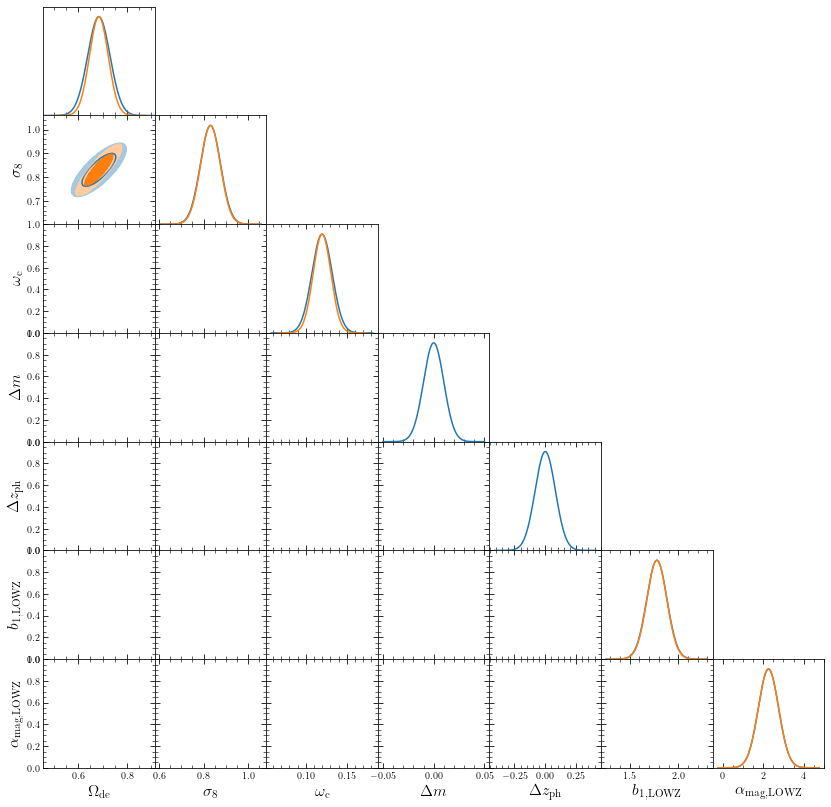

In [12]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [61]:
f = fishers_dict['Y3IAsingle1x2pt'] #['Y3IAquadruple3x2ptPrior']

In [62]:
f.names

['omega_b', 'omega_c', 'Omega_de', 'sigma8', 'ns', 'dzph', 'dm', 'A_IA']

In [63]:
f.F

array([[ 7.05865638e+03, -4.89686109e+03,  1.64745081e+04,
        -1.37011414e+04, -1.72037367e+03,  5.20012642e+03,
        -7.76165929e+03, -1.83826465e+06],
       [-4.89686109e+03,  3.52595307e+03, -1.07589712e+04,
         9.08170873e+03,  1.35726881e+03, -3.34863289e+03,
         5.06142217e+03,  1.14203010e+06],
       [ 1.64745081e+04, -1.07589712e+04,  6.65400251e+04,
        -5.38029753e+04, -3.02873996e+03,  2.16671228e+04,
        -3.19377553e+04, -7.81515909e+06],
       [-1.37011414e+04,  9.08170873e+03, -5.38029753e+04,
         4.36541295e+04,  2.69249549e+03, -1.74583081e+04,
         2.58075030e+04,  6.25966876e+06],
       [-1.72037367e+03,  1.35726881e+03, -3.02873996e+03,
         2.69249549e+03,  6.30188981e+02, -8.95448036e+02,
         1.41584691e+03,  2.61896862e+05],
       [ 5.20012642e+03, -3.34863289e+03,  2.16671228e+04,
        -1.74583081e+04, -8.95448036e+02,  7.08363200e+03,
        -1.04094425e+04, -2.56648258e+06],
       [-7.76165929e+03,  5.061422

In [17]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


/Users/sugiyamasunao/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:1551: RuntimeWarning: invalid value encountered in less
  print(name)


ValueError: max() arg is an empty sequence

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior_sigma8Ode.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

## same but with optimized $\alpha$ of $S_8$

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table_S8alphaopt.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
df

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8opt'],
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior_sigma8Ode_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8','S8opt'],
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior_sigma8Ode_S8_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

### single: degeneracy breaking comparing 1x2pt, 2x2pt, 3x2pt

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle1x2ptPrior', 'Y3IAsingle2x2ptPrior', 'Y3IAsingle3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz', 'A_IA', 'eta_IA'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle1x2ptPrior_fY3IAsingle2x2ptPrior_fY3IAsingle3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle1x2ptPrior', 'Y3IAsingle2x2ptPrior', 'Y3IAsingle3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1IAsingle1x2ptPrior_fY1IAsingle2x2ptPrior_fY1IAsingle3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple1x2ptPrior', 'Y3IAquadruple2x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

## with and without IA

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1IAsingle1x2ptPrior_fY1IAsingle2x2ptPrior_fY1IAsingle3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAdouble1x2ptPrior', 'Y3double1x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1IAsingle1x2ptPrior_fY1IAsingle2x2ptPrior_fY1IAsingle3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [ ]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple1x2ptPrior', 'Y3quadruple1x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1IAsingle1x2ptPrior_fY1IAsingle2x2ptPrior_fY1IAsingle3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])